#World Data Science Institute Internship
#Python for Finance Cookbook
#Monte Carlo Simulations in Finance
#Simulating Stock Price Dynamics using Geometric Brownian Motion 
By Brandon Oppong-Antwi, Financial Data Scientist @Linkedin 

Important Notes on Installations used for Model:

Python Version: Python 3.8.3

Tensorflow Version: Tensorflow 2.3.0

Pytorch Version: Pytorch  1.6.0 with CUDA 101

Operating System: Windows 10

# Modeling Stock Price Dynamics, using Stochastic Differential Equation

### *Abstract*

Monte Carlo Simulations comprise a broad range of computational algorithms that rely on repeated random sampling to obtain numerical results. In the oftentimes volatile financial world, these simulations allow us to assess and quantify the risk that aids financial analyst in evaluating the possible outcomes of a decision and predict the uncertain variables. In this notebook, we will build a common stochastic differential equation in Python in order to model and predict asset price dynamics. We will explain and incrementally build a model to expand upon concepts relevant to monte carlo methods in python such as the Random Walk and Wiener process (Brownian motion). We will then use these two methods in order to build a Geometric Brownian Motion(GBM) model that has a closed-form solution. For the exact GBM model, we used the adjusted close stock price from January 1,2020 to October 10, 2020 from the mobile financial company Square. Squares (SQ) share prices, were extracted from Yahoo! Finance. In the end, Euler-Maruyama approximation was used to verify our model against the closed-form solution.  

In [70]:
%matplotlib inline

In [71]:
!pip install yfinance

In [72]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.3)


In [73]:
!pip install pandas

In [74]:

import matplotlib.pyplot as plt #
import numpy as np #numpy is a software library written for Python so that we can linear algebra as well as perform mathematical operations on matrices.
import pandas as pd #pandas is a software library written for the Python programming language for data manipulation and analysis.
import yfinance as yf #yFinance allows us to see the stock price as well as access financial data a company puts out into the stock market
import datetime as dt #Datetime is software libray written for Python so that we can 

## Contents:

### *Introduction* 


#### 1. In order to build our model we will first define some relevant terminology for stocks and financial market
    - Stocks 
    - Assesst Price Prediction
    - Efficient Market Hypothesis
    - Returns
    - Adjusted Close
    - Stock Price Process

#### 2. Brownian motion
##### We will then do a general overview of the elements of Brownian motion
    2.1 Random Walk
    2.2 Wiener process(Brownian motion)
#### 3. Geometric Brownian Motion (GBM)
###### We will then use Brownian motion to identify the elements of Geometric Brownian Motion
    3.1 Euler-Maruyama Approximation
    3.2 Model GBM
#### 4. GBM Model for Square Data
###### Finally, we will create a Geometric Brownian Motion model for our Square Data
    4.1 GBM model with real data
    4.2 Euler-Maruyama Model
#### 5. Conclusion



### *Used Abbreviations*

- **GBM** - Geometric Brownian Motion 
- **SDEs** - Stochastic differential equations
- **EMH** - Efficient Market Hypothesis 
- **EM** - Euler-Maruyama Model

### *Introduction* 

 

In order to make accuracte investment decisions, simulations play an important role in making predicitions about unknown financial assests. Simulated price paths of financial assessts can allow one to forecast what the  future assest  price of a particular investment may be. 

Simulations of stocks and options are often modeled using stochastic differential equations (SDEs). From a classical understanding,  deterministic models such as ordinary differential equations, have a unique solution for each appropriate initial condition.  SDEs however have solutions that are continuous-time stochastic processes meaning that they have element of randomness. SDEs are used for stock prices because stock price movements have a certain element of "randomness" associated with them as they change over time. Methods for the computational solution of stochastic differential equations are based on similar techniques for ordinary differential equations, but generalized to provide support for stochastic oftentimes "noisy" dynamics.

Based on market restrictions and laws, Geometric Brownian Motion is a typical mathematical approach for stock price dynamics modeling. It is a stochastic process, which assumes that the returns, profits or losses, on the stock are independent and normally distributed.

Further, we will model Brownian Motion and then use it to model the closed-form solution of GBM, using Python. Then a comparison will be made between our model and the price dynamics of the realtime Square stock. We will discuss the advantages, limitations, and further improvements of the model and if GBM is actually an effective model approximation of future stock price movements.



#### 1. Important defintions for stocks and financial market

- **Stock **

A stock (also known as "shares", "assests", or "equity) is a type of security that signifies proportionate ownership in the issuing corporation. Corporations issue (sell) stocks to raise funds to operate their businesses. There are two main types of stock: common and preferred. Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well and they are the foundation of nearly every portfolio.

- **Assett Price Predicition**

Assett Price Predicition or Stock Price Prediction is the act of trying to determine a company's future stock price or another financial instrument traded on an exchange. There are several factors that can influence the future price of a particular stock including the stock price of other companies within a similar sector. The increase and decrease of stock prices of the other companies affect the stock price of a given target company. So for our example we are using financial stock prices from Square. Other companies that could influence our Square stock price could Shopify, Ally Financial, and PayPal. One most important factors however is the past performances and records of the target's company stock. 

- **Efficient Market Hypothesis (EMH)**

Efficient Market Hypothese or Efficient Market Theory essentially meals that all known(past) information about investment securities, such as its stocks, is already factored into the prices of those securities. Therefore, assuming this is true, no amount of analysis can give an investor an edge over other investors, collectively known as "the market". This means that stocks  are always traded at their fair value on exchanges, making it impossible for investors to purchase undervalued stocks or sell stocks for inflated prices. 

EMH does not require that investors be rational; it says that individual investors will act **randomly**. As a whole, the market is always "right." In simple terms, "efficient" implies "normal." For example, an unusual reaction to unusual information is normal. If a crowd suddenly starts running in one direction, it's normal for you to run in that direction as well, even if there isn't a rational reason for doing so.

This does not mean that no investors can outperform the market. It means that there are outliers that can beat the market averages, and also outliers that dramatically lose to the market. The majority is closer to the median. 
Those who "win" are lucky and those who "lose" are unlucky. 

Predictions about the stock price movements are uncertain and can only be made in terms of a probability distribution. In this context, modeling a stock price is concerned with modeling the future information, which affects it. Therefore we need two things: 

                          - probability distribution and
                            - information.

- **Returns**

A return, also known as a financial return, in its simplest terms, is the money made or lost on an investment over some period of time.

A return can be expressed nominally as the change in dollar value of an investment over time. A return can also be expressed as a percentage derived from the ratio of profit to investment.

- **Adjusted Close**
Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions. This should not be confused with the closing price of a stock which is the final price of the stock at the end of a trading day. For example, if a share with a closing price of $100 paid a $5 dividend per share, the adjusted closing price would be $95 in order to account for the newly reduced value caused by the dividend. In this experiement because we are making a predicition of future stock prices the adjusted close gives us more information.

- **Stock price process**

The Stock Price Process is a model of the price behavior of a process called "Brownian motion". Further, we will explain this process and the derivatives and will use it to model stock price movements. Our experiment will be followed by conclusions about the real-life application of this process to predict future stock price changes. In the example below, we will use the Adjusted Close price of the stock.

In [75]:
#Extract data for the stock price of SQUARE data over from January 1,2020 to October 10, 2020.

STOCK_NAME = 'SQ' #name of the stock from yfinance
START_DATE = '2020-01-01' #staring time interval for our stock
END_DATE = '2020-10-10' #ending time interval for our stock 


SQ = yf.download(STOCK_NAME, start = START_DATE, end = END_DATE, adjusted = True) #download the data from yfinance


adj_close = SQ['Adj Close']
returns = adj_close.pct_change().dropna() #used to drop missing values


print(f'Download {SQ.shape[0]} rows of data') #print how many rows of data 

SQ.head() #prints the first five rows



[*********************100%***********************]  1 of 1 completed
Download 196 rows of data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,62.990002,64.050003,62.950001,63.830002,63.830002,5264700
2020-01-03,62.590000,63.270000,62.330002,63.000000,63.000000,5087100
2020-01-06,61.360001,62.580002,61.130001,62.570000,62.570000,5905200
2020-01-07,64.570000,65.489998,63.660000,64.589996,64.589996,10368200
2020-01-08,64.559998,68.000000,64.150002,67.599998,67.599998,11899200


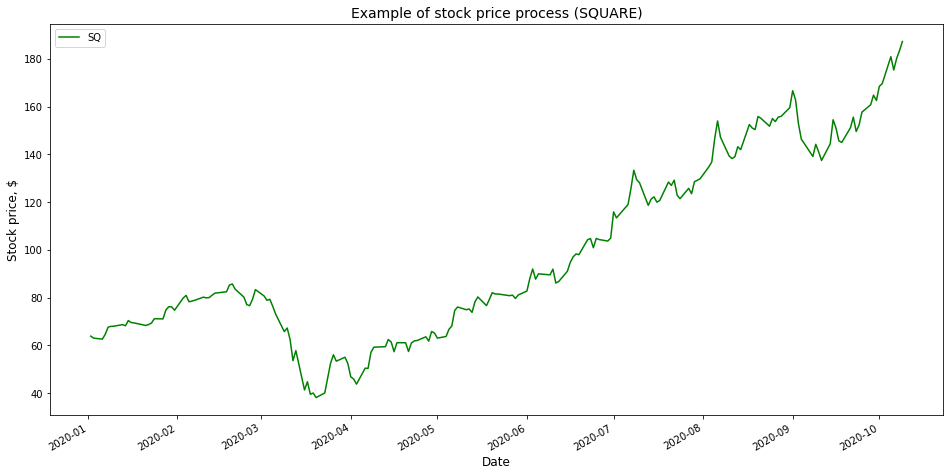

In [76]:
#visualize the data
adj_close.plot(label = 'SQ', figsize = (16,8), color = "g") #This will be we our plot
plt.title('Example of stock price process (SQUARE)', fontsize = 14) #Plot Title
plt.xlabel('Date', fontsize = 12) #xlabel
plt.ylabel('Stock price, $', fontsize = 12) #ylabel
plt.legend(loc = 'upper left') #code for upper left positioning
plt.show()

### Calculate the Daily Returns 

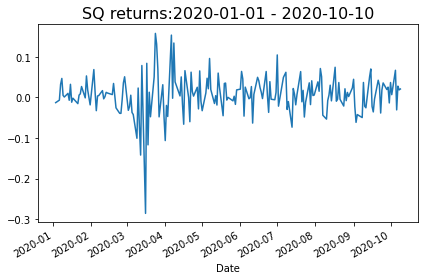

Average return: 0.67%


In [77]:
adj_close = SQ['Adj Close'] #a stock's closing price to reflect that stock's value after all splits and dividends
returns = adj_close.pct_change().dropna() #drop any missing values from the stocks data

ax = returns.plot() #plot the returns
ax.set_title(f'{STOCK_NAME} returns:{START_DATE} - {END_DATE}', fontsize = 16) #creates axis title for our plot

plt.tight_layout()
plt.show()

print(f'Average return: {100* returns.mean():.2f}%')






#### 2. Brownian Motion

    2.1 Random Walk 
A random walk  aka a *"drunkard's walk"* (this may be experienced after having too much wine at your friend's dinner party) is the first step to understanding the Brownian motion. It is a stochastic process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

To construct a random walk model a typical example would consists of the following components:

For an integer n, n>0, we define the Random Walk process at the time $\mathit t $ {$ \mathit W_n(t) > 0 $} as follows:
1. The initial value of the process is: $ \mathit W_n(0) = 0 $
2. The layer spacing between two successive jumps is equal to $ \mathit 1/n $
3. The "up" and "down" jumps are equal and of size $ \mathit 1/\sqrt{n}$, with equal probability.


### T'Challa's Pathway

In order to visual a random walk lets think of a simple example. Let's say that we live in the fictional land of "Wakanda" and we are asked to help our friend "T'Challa" find his way home. Wakanda is unlike any other city in that it is home to superhero, the Black Panther, but also the streets are arranged in a perfect grid. This means that at each street intersection T'Challa chooses his next direction randomly amognst the cardinal directions North,South, East, and West. In our example north and south will represent the y direction. The x direction with represent the east and west direction. This pathway means that T'Challa can move similar to a pathway like the integer number line which starts at 0 and at each step moves +1 or -1 with equal probability in the respective x and y directions. We can express this process mathematically. Lets $ \mathit x_n $ is the "walkers" position at time $ \mathit n $. This position is an evolution from a moment before - $ \mathit n - 1 $, obtained by adding a random variable $ \mathit s $ to the previous position $ \mathit x_{n-1} $. The probabilities for moving upwards(+1) or backwards (-1) are as follows: $ \mathit P(s = 1) = 1/2 $ and $ \mathit P(s = -1) = 1/2 $. So now, the next step can be expressed mathematically as:

$x_n = x_n-1 + s,  x_0 = 0, P(s = 1) = P(s = -1) = 1/2 $


    
We implement an example of a simple 1-D random walk below as well as the gridpathway that T'Challa walks on.

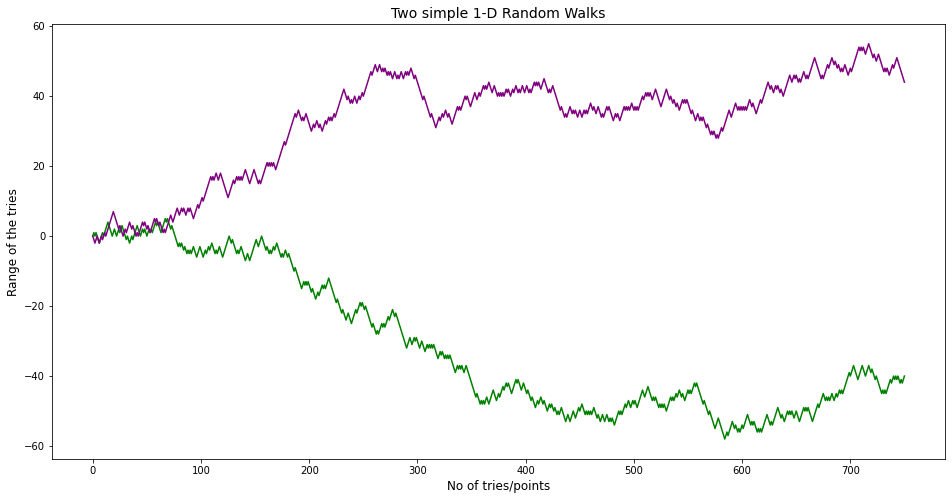

In [78]:
#We will visualize two simple 1D random walks where "T'Challa" can move either "up or down the road".
#We assume that he either walked in 1 dimension for instance the x direction 
#The probability to make step up or down is equal
prob = [0.5, 0.5]

steps = 750  #amount of steps he took from his original start position at (0,0)
 
#Define the random walk function with steps count and probabilities for up and down 

def SimpleRandomWalk(N, p1, p2, color):
    
    #statically defining the starting position
    start = 0
    positions = [start]
    
    #creating random points between 0 and 1 / the steps
    rand_p = np.random.random(steps)
    
    #creating lists of steps for both directions
    down_p = rand_p < prob[0]
    up_p = rand_p > prob[1]

    for down, up in zip(down_p, up_p): #the random walk process
        if down == 1 and up == 0:
            movement = -1  
        elif down == 0 and up == 1:
            movement = 1
        positions.append(positions[-1] + movement) #[-1] takes the last element, since the next move depends on it
        
    plt.plot(positions, color)
    plt.title('Two simple 1-D Random Walks', fontsize = 14)
    plt.xlabel('No of tries/points', fontsize = 12)
    plt.ylabel('Range of the tries', fontsize = 12)
    
    return None

        

plt.figure(figsize = (16, 8))



SimpleRandomWalk(steps, prob[0], prob[1], color = "green")

SimpleRandomWalk(steps, prob[0], prob[1], color = "purple")
plt.show()


    2.2 Wiener process(Brownian motion)

Before we can model the GBM with real data, we first need to explain and create a model for the general case Brownian Motion, which is the stochastic (random) portion of the GBM equation.

In mathematics, the **Wiener process** named after highly esteemed mathematician, Nobert Wiener, is a continuous-time stochastic process. It is often called standard Brownian motion process or Brownian motion due to its historical connection with the physical process known as Brownian motion originally observed by Robert Brown. 

The Wiener process $ \mathit W_t $ is characterised by the following properties:
1. $ \mathit {W_0} = 0 $ 
2. $ \mathit {W} $ has independent increments: for every $\mathit t > 0 $, the future increments $ \mathit {W_{t+u}-W_t}, \hspace{0.1cm} {u >= 0} $, are independent of the past walues $ \mathit {W_s}, \hspace{0.1cm} s > t $.
3. $ \mathit {W} $ has Gaussian increments: $ \mathit {W_{t+u} - W_t} $ is normally distributed with mean 0 and variance $ \mathit {u}, \hspace{0.1cm} {W_{t+u} - W_t} ~ N(0, u) $.
4. $ \mathit {W} $ has continuous paths: With probability 1, $ \mathit W_t $ is continuous in $ \mathit t $.

The process has independent increments means that if $\mathit 0 <= s_1 < t_1 <= s_2 < t_2 $ then $\mathit W_{t_1} - W_{s_1}$ and $\mathit W_{t_2} - W_{s_2}$ are independent random variables, and the similar condition holds for $\mathit n $ increments.

To simulate single Brownian increment $\mathit W_i $ at one fixed time increment is computed by multiplying a standard random variable $\mathit z_i $ from a normal distribution $\mathit N(0, 1)$ with mean **0** and standard deviation **1** by the square root of the time increment $\mathit {\sqrt {\Delta t_i}}$:


$ {\Delta W_i = z_i{\sqrt {\Delta t_i}} } $

The cumulative sum of the Brownian increments is the discretized Brownian path.

$ \mathit W_n(t) = \sum_{i=1}^n{W_i(t)}  $


Below we will model Brownian Motion. First, we need to generate standard random variables from the normal distribution $\mathit N(0, 1)$. Then we will multiply them by the square root of the time step. Finally, we will compute their cumulative sum and generate the Brownian Motion.

In [79]:
T = 1.        #time interval
N = 250        #number of points


seed = 20

dt = T / N                 #time step
t = np.arange(0.0, 1.0, dt)

def BrownianMotion(seed, N):
    
    np.random.seed(seed)

    Z = np.random.randn(N)     #random variables
    Z[0] = 0
    
    dW = np.sqrt(dt)* Z        #single Brownian increment
    
    W = np.cumsum(dW)          #Brownian path
    
    return W

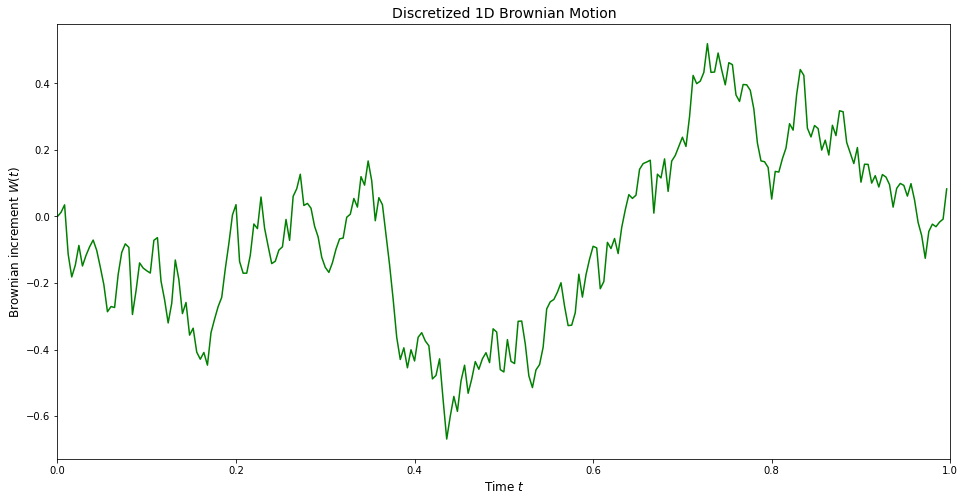

In [80]:
W = BrownianMotion(seed, N)

plt.figure(figsize = (16, 8))
plt.plot(t, W, color = "green")
plt.title('Discretized 1D Brownian Motion', fontsize = 14)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('Brownian increment $W(t)$', fontsize = 12)
axes = plt.gca()
axes.set_xlim([0,T])
plt.show()

As we can see the plot of the Brownian Motion shows a path that looks similar to the movement of a stock price.

#### 3. Geometric Brownian Motion (GBM)

Now that we have visualized the movement of the general case of Brownian motion for stock price movement or any type of movement with randonmess associated with it we can then create a more specific model for price stock dynamics. A stochastic differential equation involving stock price dynamics is usually represented by a specific equation called the Black-Scholes diffusion equation:

$ \mathbf {dS_t} = \mu S_t \hspace{0.1cm} dt +  \sigma S_t \hspace{0.1cm} dW_t $


where,
   - $ \mathbf S $ is the *stock price*, 
   - $ \mathbf \mu $ is the *drift coefficient* (the mean of returns over some time period), 
   - $ \mathbf \sigma $ is the *diffusion coefficient* (standard deviation of the returns), and
   - $ \mathit W_t $ is the *Wiener process (Brownian motion)*.

Coefficients $\mathit \mu$ and $\mathit \sigma$ are both *constant* in this model. In more sophisticated models they can be made to be functions of $\mathit t, S_t$ and other stochastic processes.

As we can see SDEs have both deterministic(drift) component and stochastic(diffusion) component $\mathit W_t$. The latter was calculated and visualized in the previous section. 
For the SDE above (the Black Scholes Differential Equation), with an initial condition for the stock price of $\mathit S(0) = S_0 $, the closed-form solution of GBM is:


$ \mathit \textstyle S(t) = S_0e^{(\mu - \frac {1}{2}\sigma^2)t+\sigma{W_t}} $

This solution is solved using the Itô interpretation or Ito calculus (which we will not derive in this notebook, a linke for the derviation is in the works cited). It should be noted that a small amount of SDES actually have closed-form solutions. For the ones that do not, we need to use numerical method approximation techniques to derive a solution.


    3.1 Euler-Maruyama Approximation

In order for us to derive solutions for our SDE we need a method that can create these simulations. The Euler-Maruyama Method (EM) is a method for simulating solutions of SDEs. This method parallels the euler method approximation used to derive solutions for ordinary differential equations. From the example in the previous section, the Black Scholes Equations requires a closed-form solution for the stochastic differential equation. The EM generates a stochastic process path approximation. 

To develop an approximate solution on the arbitary interval $\mathit [c,d]$, we assign a grid of points

$$\mathit c = t_o < t_1 < t_2 < ... < t_n = d $$
Approximate $\mathit s$ values
$$\mathit w_o < w_1 < w_2 < ... < w_n$$
will be determined at the respective $\mathit t$ points. 

We can compute the approximate solution of Black-Scholes SDE with EM:

$
w_0 = S_0
$


$
w_{i+1} = w_i + \mu w_i \Delta t_i + \sigma w_i \Delta W_i  
$

Each random increment is computed as shown in equation (1). Each set of $\mathit {w_0,...,w_n}$, produced by the EM is an approximate realization of the solution stochastic process $\mathit S(t)$. The latter depends on the random numbers $\mathit z_i$. Given that $\mathit W_t$ is a stochastic process, each realization will be different and so will our approximations.  

The overall purpose of the EM approximation and thus the work we have done so far is to serve  as a verification of our model by comparing it to the closed-form solution. The purpose of comparing if the results are similar to the closed-form solution is to check if we are solving the mathematical model correctly. 

Further, we will build a GBM model with assumed values of $\mathit \mu$, $\mathit \sigma$, and initial stock price $\mathit S_0$. Then we will use this GBM model to see how it works for Square stock price dynamices. Finally, we will build an EM to approximate a stock price path and make conclusions about the GBM model.

    3.2 GBM Model

In [81]:
#Constructing GBM

# Parameters:
# So - initial stock price = 56.23
# mu - the mean of returns = 0.2
# sigma - standard deviation of returns (volatility) = 0.45
# W - Brownian motion/stochastic part
# T - time horizon
# N - number of intervals
# We are using equation (4)

def simulate_GBM(So, mu, sigma, W, N, t):  #Function used for simulating stock returns using Geometric Brownian Motion
    
    S = [] #create array
    S.append(So)
          
    for i in range(1,N):  #for integers 1 to the number intervals 
        drift = (mu - 0.5 * sigma**2) *t[i]       #Calculating the deterministic part
        diffusion = sigma * W[i-1]                #Calculating the stochastic part
        S_i = So * np.exp(drift + diffusion)
        S.append(S_i)
        
    return S

So = 56.23
mu = 0.15
sigma = 0.6
W = BrownianMotion(seed, N)
N = 250     #assume 250 trading days for one year   
T = 1.0        

t = np.linspace(0., T, N)    #time increments


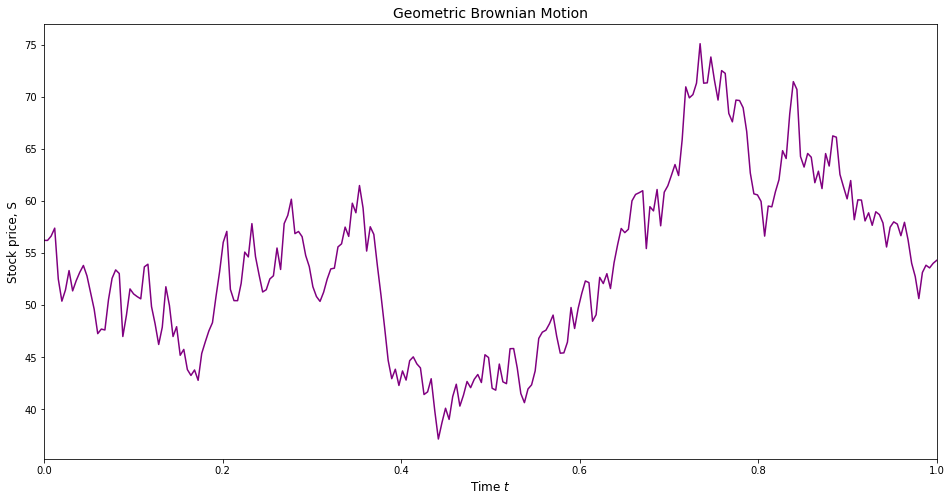

In [82]:
#plot solution

solution = simulate_GBM(So, mu, sigma, W, N, t)

plt.figure(figsize = (16, 8))
plt.plot(t, solution, color = "purple")

plt.title('Geometric Brownian Motion', fontsize = 14)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('Stock price, S', fontsize = 12)
axes = plt.gca()
axes.set_xlim([0,T])
plt.show()

If you look at this plot it is resemblent of a typical stock price movement chart, The axis represents a full trading year with 250 trading days. It is important to keep in mind that in the beginning when we constructed the Brownian Motion, we set a seed = 15. The seed is crucial in that if we change the seed the path of our stock will untimately change as well. This model is also extremely simplified. We don't take into account severe "shocks" or the volatitly that many major stocks experience.

#### 4. GBM in Practice    

In this section, we will apply the GBM for the shares of Square stock(SQ) and compare it to the actual stock prices. We will use data for the daily returns of Square for the first day of 2020 to today's date (Oct. 11, 2020).

We will use the python library yfinance from earlier as a source of our price data. Below we will show part of the data to be sure we are using the right information. Then we will use the adjusted closing prices for plotting since they are a more accurate representation of the price value of the stocks.

In [83]:
STOCK_NAME = 'SQ'
START_DATE = '2020-01-01'
END_DATE = '2020-10-10'


SQ = yf.download(STOCK_NAME, start = START_DATE, end = END_DATE, adjusted = True)


print(f'Download {SQ.shape[0]} rows of data')

SQ.head()

[*********************100%***********************]  1 of 1 completed
Download 196 rows of data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,62.990002,64.050003,62.950001,63.830002,63.830002,5264700
2020-01-03,62.590000,63.270000,62.330002,63.000000,63.000000,5087100
2020-01-06,61.360001,62.580002,61.130001,62.570000,62.570000,5905200
2020-01-07,64.570000,65.489998,63.660000,64.589996,64.589996,10368200
2020-01-08,64.559998,68.000000,64.150002,67.599998,67.599998,11899200


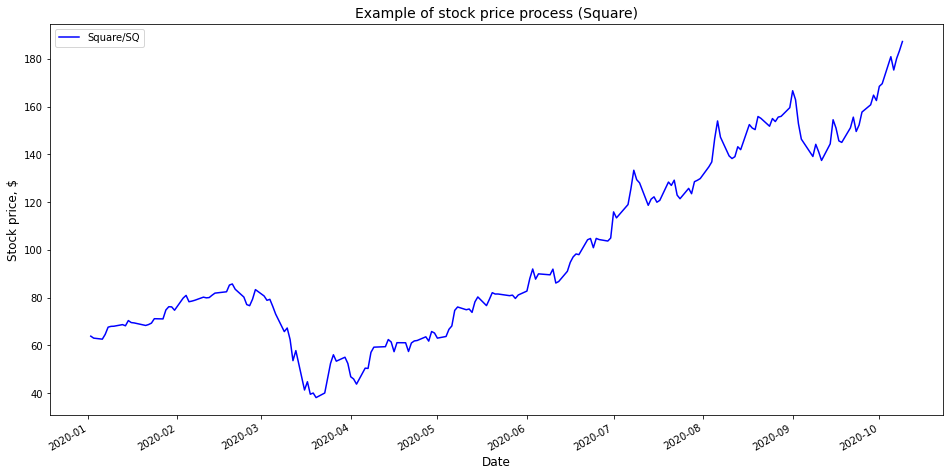

In [84]:
adj_close = SQ['Adj Close']
adj_close.plot(label = 'Square/SQ', figsize = (16,8), color = "blue")
plt.title('Example of stock price process (Square)', fontsize = 14)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Stock price, $', fontsize = 12)
plt.legend(loc = 'upper left') 
plt.show()



You can compare this plot with the correct chart [here](https://finance.yahoo.com/quote/SQ/chart?p=SQ#eyJpbnRlcnZhbCI6ImRheSIsInBlcmlvZGljaXR5IjoxLCJjYW5kbGVXaWR0aCI6NS43OTA4MTYzMjY1MzA2MTIsInZvbHVtZVVuZGVybGF5Ijp0cnVlLCJhZGoiOnRydWUsImNyb3NzaGFpciI6dHJ1ZSwiY2hhcnRUeXBlIjoibGluZSIsImV4dGVuZGVkIjpmYWxzZSwibWFya2V0U2Vzc2lvbnMiOnt9LCJhZ2dyZWdhdGlvblR5cGUiOiJvaGxjIiwiY2hhcnRTY2FsZSI6ImxpbmVhciIsInBhbmVscyI6eyJjaGFydCI6eyJwZXJjZW50IjoxLCJkaXNwbGF5IjoiU1EiLCJjaGFydE5hbWUiOiJjaGFydCIsImluZGV4IjowLCJ5QXhpcyI6eyJuYW1lIjoiY2hhcnQiLCJwb3NpdGlvbiI6bnVsbH0sInlheGlzTEhTIjpbXSwieWF4aXNSSFMiOlsiY2hhcnQiLCJ2b2wgdW5kciJdfX0sImxpbmVXaWR0aCI6Miwic3RyaXBlZEJhY2tncm91bmQiOnRydWUsImV2ZW50cyI6dHJ1ZSwiY29sb3IiOiIjMDA4MWYyIiwic3RyaXBlZEJhY2tncm91ZCI6dHJ1ZSwicmFuZ2UiOnsiZHRMZWZ0IjoiMjAyMC0wMS0wMVQwNTowMDowMC4wMDBaIiwiZHRSaWdodCI6IjIwMjAtMTAtMTFUMDM6NTk6MDAuMDAwWiIsInBlcmlvZGljaXR5Ijp7ImludGVydmFsIjoiZGF5IiwicGVyaW9kIjoxfSwicGFkZGluZyI6MH0sImV2ZW50TWFwIjp7ImNvcnBvcmF0ZSI6eyJkaXZzIjp0cnVlLCJzcGxpdHMiOnRydWV9LCJzaWdEZXYiOnt9fSwiY3VzdG9tUmFuZ2UiOnsic3RhcnQiOjE1Nzc5NDEyMDAwMDAsImVuZCI6MTYwMjEyOTYwMDAwMH0sInN5bWJvbHMiOlt7InN5bWJvbCI6IlNRIiwic3ltYm9sT2JqZWN0Ijp7InN5bWJvbCI6IlNRIiwicXVvdGVUeXBlIjoiRVFVSVRZIiwiZXhjaGFuZ2VUaW1lWm9uZSI6IkFtZXJpY2EvTmV3X1lvcmsifSwicGVyaW9kaWNpdHkiOjEsImludGVydmFsIjoiZGF5IiwidGltZVVuaXQiOm51bGx9XSwic3R1ZGllcyI6eyJ2b2wgdW5kciI6eyJ0eXBlIjoidm9sIHVuZHIiLCJpbnB1dHMiOnsiaWQiOiJ2b2wgdW5kciIsImRpc3BsYXkiOiJ2b2wgdW5kciJ9LCJvdXRwdXRzIjp7IlVwIFZvbHVtZSI6IiMwMGIwNjEiLCJEb3duIFZvbHVtZSI6IiNGRjMzM0EifSwicGFuZWwiOiJjaGFydCIsInBhcmFtZXRlcnMiOnsid2lkdGhGYWN0b3IiOjAuNDUsImNoYXJ0TmFtZSI6ImNoYXJ0IiwicGFuZWxOYW1lIjoiY2hhcnQifX19LCJ0aW1lVW5pdCI6bnVsbH0-)

    4.1 GBM with real data

This time we will not assume $\mathit \mu$ and $\mathit \sigma$. We will compute their values from the data that we have. Let's start with calculating the daily returns:

In [85]:
# Stock Return (excl. dividents) = (P1 - P0)/P0, where P0 = Initial Stock Price, P1 = Ending Stock Price (Period 1)
adj_reversed = list(reversed(adj_close))

def daily_return(adj_reversed):
    returns = []
    for i in range(0, len(adj_reversed)-1):
        today = adj_reversed[i+1]
        yesterday = adj_reversed[i]
        
        daily_return = (today - yesterday)/yesterday
        
        returns.append(daily_return)
    return returns      

returns = daily_return(adj_reversed)


In [86]:
#compute the drift(mean) and diffusion(variance) coefficients and annualize it by multiplying by 250 trading days 
mu = np.mean(returns) * 250.            
sig = np.std(returns)* np.sqrt(250.)

print(mu)
print(sig)

-1.061607373053694
0.8189429417667796


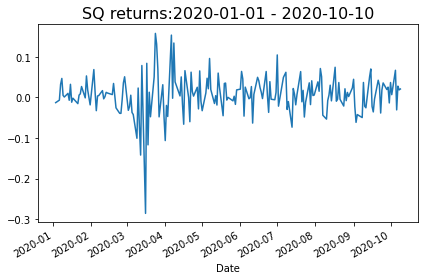

Average return: 0.67%


In [87]:
adj_close = SQ['Adj Close'] #a stock's closing price to reflect that stock's value after all splits and dividends
returns = adj_close.pct_change().dropna() #drop any missing values from the stocks data

ax = returns.plot() #plot the returns
ax.set_title(f'{STOCK_NAME} returns:{START_DATE} - {END_DATE}', fontsize = 16) #creates axis title for our plot

plt.tight_layout()
plt.show()

print(f'Average return: {100* returns.mean():.2f}%')






Assuming constant drift and volatility throughout a longer time period is not realistic. This is why the model was created only for the period of ten month, a few months short of a year(which is not too short but it is not too long).Since we have computed the drift and diffusion coefficients, it is time to build the GBM function of our Square stock. We will base it on the Black Scholes equation where we actually have an exact solution. 

In [88]:
#GBM based on real stock prices

'''
Generalized procedure for stock price from Python for Finance Cookbook:
s_0 : float
        Initial stock price
    mu : float
        Drift coefficient
    sigma : float
        Diffusion coefficient
    n_sims : int
        Number of simulations paths
    dt : float
        Time increment, most commonly a day
    T : float
        Length of the forecast horizon, same unit as dt
    N : int
        Number of time increments in the forecast horizon
    random_seed : int
        Random seed for reproducibility

    Returns
    -----------
    S_t : np.ndarray
        Matrix (size: n_sims x (T+1)) containing the simulation results. 
        Rows respresent sample paths, while columns point of time
  '''

# Parameters:
# So - initial stock price 
# mu - the mean of returns 
# sigma - standard deviation of returns (volatility)
# W - Brownian motion
# T - time horizon
# N - number of intervals

def GBM_Exact(So, mu, sigma, W, N, t):
    
    S = []
    S.append(So)
          
    for i in range(1,N):
        drift = (mu - 0.5 * sigma**2) *t[i]       #Calculating the deterministic part
        diffusion = sigma * W[i-1]                #Calculating the stochastic part
        S_i = So * np.exp(drift + diffusion)
        S.append(S_i)
        
    return S


So = adj_reversed[0]
W = BrownianMotion(seed, N)
N = 250     #assume 250 trading days which is approximate to a full year   
T = 1.0        

t = np.linspace(0., T, N)    #time increments

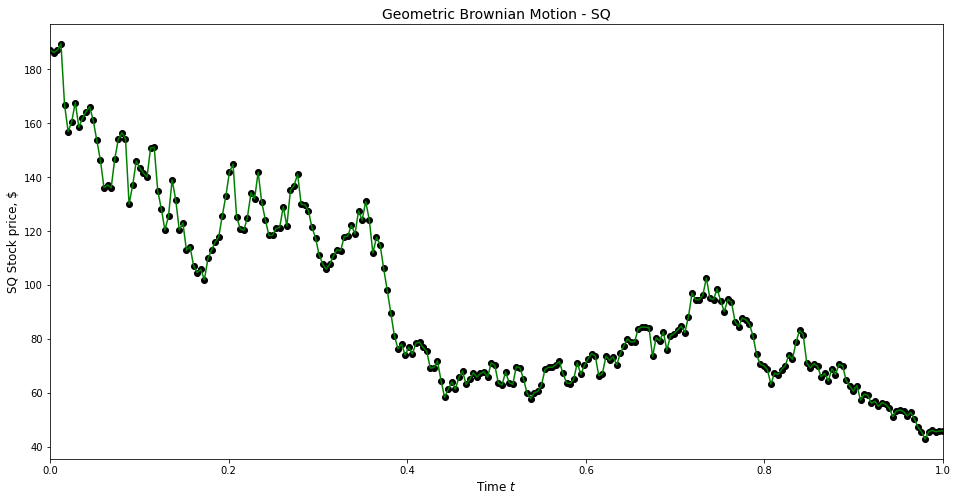

In [89]:
#plot solution

solution = GBM_Exact(So, mu, sig, W, N, t)
solution_adjreversed = GBM_Exact(So, mu, sigma, W, N,t)

plt.figure(figsize = (16, 8))
plt.plot(t, solution, color = "green")

plt.scatter(t, solution, color = "black")
plt.title('Geometric Brownian Motion - SQ', fontsize = 14)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('SQ Stock price, $', fontsize = 12)

axes = plt.gca()
axes.set_xlim([0,T])
plt.show()

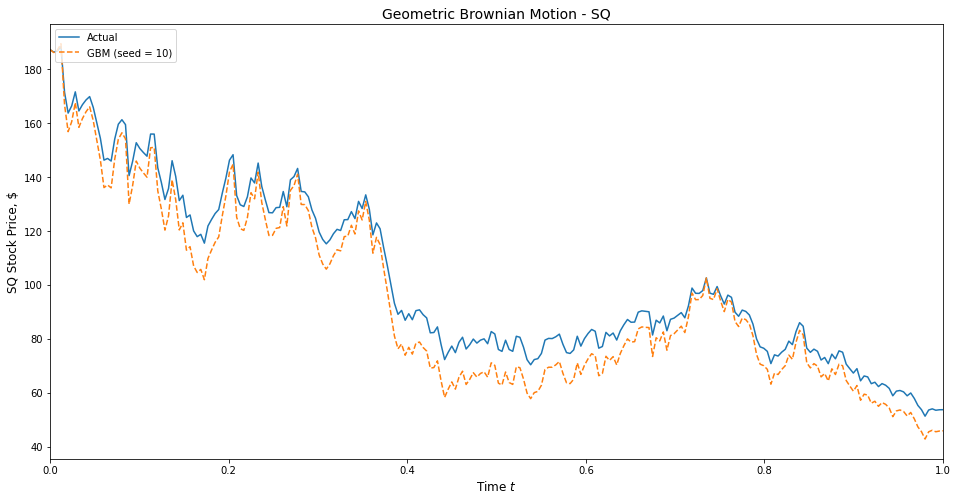

In [90]:
plt.figure(figsize = (16, 8))


plt.plot(t,solution_adjreversed, label = 'Actual') #plot the actual GBM with the adjusted reversed closing prices
plt.plot(t, solution, label = 'GBM (seed = 10)', ls='--') #plot the GBM with seed of 10

plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('SQ Stock Price, $', fontsize = 12)
plt.title('Geometric Brownian Motion - SQ', fontsize = 14)

plt.legend(loc = 'upper left')
axes = plt.gca()
axes.set_xlim([0,T])
plt.show()

Now let's plot the GBM models with different random seeds to see how the path changes. Again we will compare it with the actual Square stock prices. 

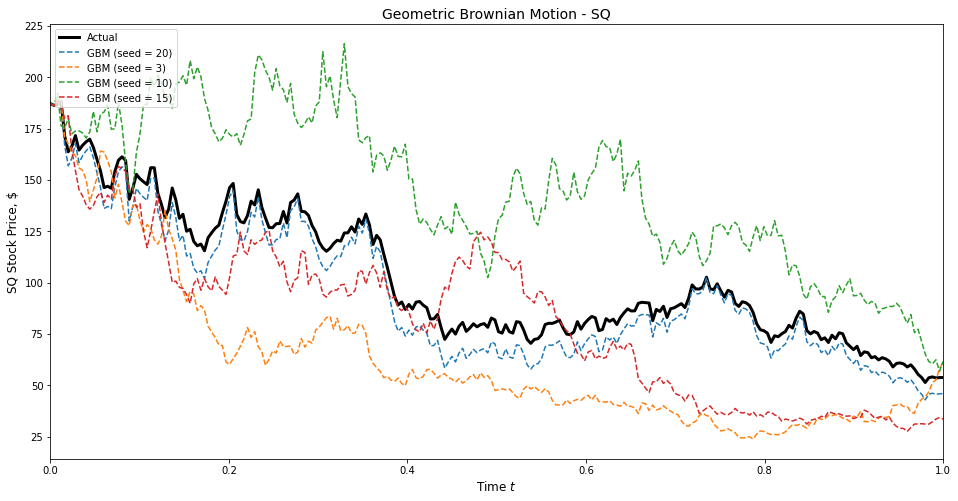

In [91]:
N =250
So = adj_reversed[0]

seed = 3
W = BrownianMotion(seed, N)
solution2 = GBM_Exact(So, mu, sig, W, N, t)

seed = 10
W = BrownianMotion(seed, N)
solution3 = GBM_Exact(So, mu, sig, W, N, t)

seed = 15
W = BrownianMotion(seed, N)
solution4 = GBM_Exact(So, mu, sig, W, N, t)

seed = 20
W = BrownianMotion(seed, N)
solution = GBM_Exact(So, mu, sig, W, N, t)

plt.figure(figsize = (16, 8))


plt.plot(t, solution_adjreversed, label = 'Actual', linewidth = 3, color = "black")
plt.plot(t, solution, label = 'GBM (seed = 20)', ls='--')
plt.plot(t, solution2, label = 'GBM (seed = 3)', ls='--')
plt.plot(t, solution3, label = 'GBM (seed = 10)', ls='--')
plt.plot(t, solution4, label = 'GBM (seed = 15)', ls='--')


plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('SQ Stock Price, $', fontsize = 12)
plt.title('Geometric Brownian Motion - SQ', fontsize = 14)

plt.legend(loc = 'upper left')
axes = plt.gca()
axes.set_xlim([0,1.])
plt.show()

What we can see is that depending on the random numbers that are being generated, the path changes its shape. In order to generalize our model we need to add more simulations. We will run a 100 simulations in order to do this.

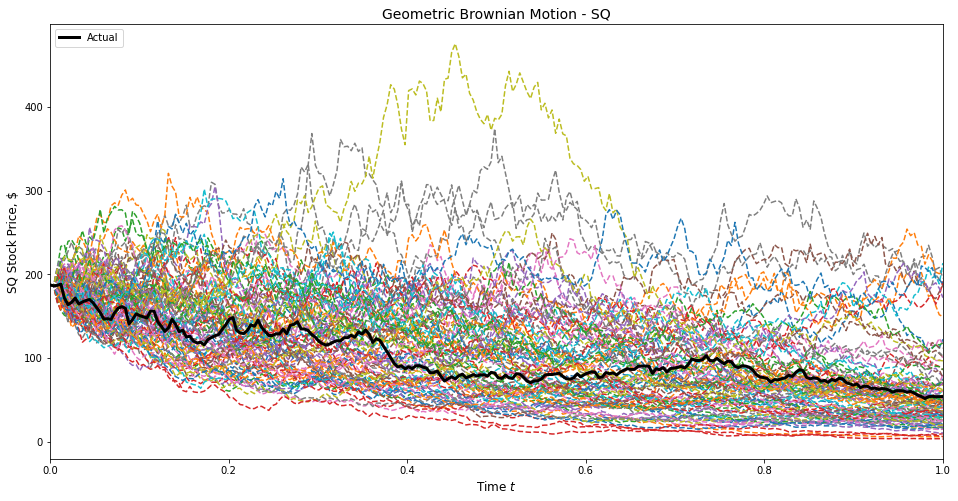

In [92]:
T=1.
N = 250
So = adj_reversed[0]

plt.figure(figsize = (16, 8))

for seed in range(1, 100):   
    W = BrownianMotion(seed, N)  
    solution = GBM_Exact(So, mu, sig, W, N, t)
    plt.plot(t, solution, ls='--')
    
plt.plot(t, solution_adjreversed, label = 'Actual', color = "black", linewidth = 3)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('SQ Stock Price, $', fontsize = 12)
plt.title('Geometric Brownian Motion - SQ', fontsize = 14)

plt.legend(loc = 'upper left')
axes = plt.gca()
axes.set_xlim([0,T])

plt.show()

    4.2 Euler-Maruyama Model

Now that we see that our GBM model is working, we will build the EM model to approximate a path. We did not try to fit the model to any path since this could lead to overfitting which in turn leads to unwanted errors and thus reduces the predictive power of our model.

We will use a seed = 20 and equation (5).

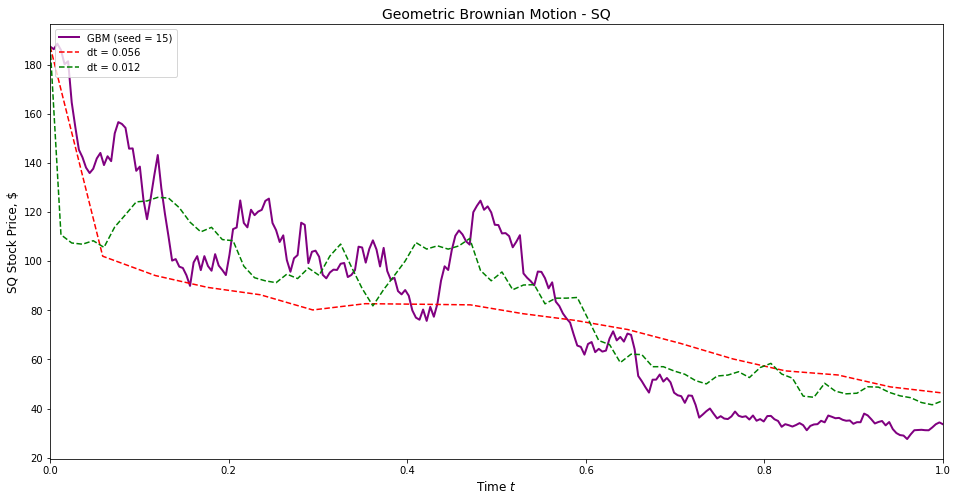

In [93]:
# Parameters:
# So - initial stock price 
# mu - annualized mean of returns 
# sigma - standard deviation of returns (volatility)
# W - Brownian motion
# T - time horizon
# N - number of intervals
# TS - time step


#GBM - SQ
T=1.
N = 250
So = adj_reversed[0]  #adj. close price of GOOGL as of January 3rd, 2017 

seed = 15
W = BrownianMotion(seed, N)
solution = GBM_Exact(So, mu, sig, W, N, t)  #exact solution
t = np.linspace(0., 1., N)    #time increments

plt.figure(figsize = (16, 8))

plt.plot(t, solution, label = 'GBM (seed = 15)', color = "purple", linewidth = 2)



#Euler Maruyama Approximation

    
def Em(So, mu, sigma, b, T, N, TS):
    dt = TS * (1./N)                            # EM step size
    L = N / TS                              # intervals according to the TS
    wi = []
    wi.append(So)
    for i in range (0, int(L)):
        delta_Wi = b[i-1] - b[i]
        wi_new = wi[i] + mu * wi[i] * dt + sigma *wi[i] * delta_Wi
        wi.append(wi_new)
    return wi, dt




#Different time step sizes


b = BrownianMotion(seed, N)
TS = 14
L = N/TS
Approx_1 = Em(So, mu, sig, W, T, N, TS)[0]
time_Em_1 = np.linspace(0., 1., int(L+1))
dt_1 = Em(So, mu, sig, W, T, N, TS)[1] #0.056

b = BrownianMotion(seed, N)
TS = 3
L = N/TS
Approx_2 = Em(So, mu, sig, W, T, N, TS)[0]
time_Em_2 = np.linspace(0., 1., int(L+1))
dt_2 = Em(So, mu, sig, W, T, N, TS)[1] #0.012

plt.plot(time_Em_1, Approx_1, label = 'dt = 0.056', color = "red", ls = '--')
plt.plot(time_Em_2, Approx_2, label = 'dt = 0.012', color = "green", ls = '--')


plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('SQ Stock Price, $', fontsize = 12)
plt.title('Geometric Brownian Motion - SQ', fontsize = 14)

plt.legend(loc = 'upper left')
axes = plt.gca()
axes.set_xlim([0,T])
plt.show()

#### 5. Conclusion
Our results show that if we choose a smaller time step the EM model better approximates the solution. When we increase the time step we still follow the trend but the sharp movements (changes in the price dynamics and direction) are not detected.   
The biggest stipulation with our conclusion is the assumption that the drift and volatility are constant over time. This would be more visible if we had chosen bigger time period.

### References Footnotes

<span id="fn*"> ** *: ** [SDEs](http://math.gmu.edu/~tsauer/pre/sde.pdf) 

<span id="fn1"> **1. Stock Definition:** [Investopedia](https://www.investopedia.com/terms/s/stock.asp) 

<span id="fn2"> **2. EMS:** [TheBalance.com](https://www.thebalance.com/efficient-markets-hypothesis-emh-2466619) 

https://www.investopedia.com/terms/e/efficientmarkethypothesis.asp


<span id="fn3"> **3. **[**Adj. Close:**](https://budgeting.thenest.com/adjusted-closing-price-vs-closing-price-32457.html) -

<span id="fn4"> **4.** Dmouj, Abdelmoula; **"Stock price modeling: Theory and Practice"**, 2.4 Random Walk, pg. 10, Vrije Universiteit, Faculty of sciences Amsterdam, The Netherlands</span>

<span id="fn5"> **5. Wiener process:** [Wikipedia](https://en.wikipedia.org/wiki/Wiener_process) </span>

<span id="fn6"> **6. a.s.:** An event happens almost surely if it happens with probability one. In other words, the set of possible exceptions may be non-empty, but it has probability zero.  </span>

<span id="fn7"> **7. Itô calculus:** [Wikipedia](https://en.wikipedia.org/wiki/It%C3%B4_calculus) </span>

<span id="fn8"> **8. Euler-Maruyama method:** Dunbar, Steven R.;[Stochastic Processes and Advanced Mathematical Finance](http://www.math.unl.edu/~sdunbar1/MathematicalFinance/Lessons/StochasticCalculus/StochasticDEs/stochasticdes.pdf), University of Nebraska-Lincoln </span>

<span id="fn9"> **9. Overfitting:** [Investopedia](https://www.investopedia.com/terms/o/overfitting.asp) </span>


### References
1. This notebook is created on the base of this work - Github: Sullivan, John, [Stochastic Calculus with Python: Simulating Stock Price Dynamics](https://jtsulliv.github.io/stock-movement/) 
2. This notebook was also created on the base work of this model:
https://github.com/PacktPublishing/Python-for-Finance-Cookbook/tree/master/Chapter%2006
3. [Simulating Brownian motion (BM) and geometric Brownian motion (GBM)](http://www.columbia.edu/~ks20/4404-Sigman/4404-Notes-sim-BM.pdf), 
4. Quantopian: [Learning SDEs in Python](https://www.quantopian.com/posts/learning-sdes-in-python)
5. Quantstart: [Geometric Brownian Motion](https://www.quantstart.com/articles/Geometric-Brownian-Motion)
6. Simulating Stock Prices Research: https://uu.diva-portal.org/smash/get/diva2:1218088/FULLTEXT01.pdf
